<a name="title"></a>

# Lab 8: Symbolic Integration and the Fundamental Theorem of Calculus

---

The [SymPy library](https://www.sympy.org/en/index.html) is the most popular Python library for symbolic mathematics. In [previous Python labs](https://colab.research.google.com/drive/1ZfB95oBzpcOLRTQ_aEhCjIoBuOMDykh3?usp=sharing), we have seen how to perform symbolic differentiation using `sympy.diff()`, solve algebraic equations with `sym.solve()`, evaluate symbolic functions with `sympy.evalf()`, and simplify algebraic expressions with `sympy.simplify()`. In this lab, we use built-in SymPy functions to perform symbolic integration to evaluate both indefinite and definite integrals.



# Learning Objectives

---




## Saving Your Work to a Colab Notebook

---

This lab is a shared Colab notebook available for anyone to view. However, since everyone is sharing this notebook, you do not have permission to save changes to this shared Colab notebook. In order to save your work:

1. You will need to set up a free Google Drive account. If you already have a Google Drive account, you are ready to go!
2. Click the `Copy to Drive` button to the right of the `+ Code` and `+ Text` buttons on top of the notebook.
3. Select from the menu `File/Save a Copy in Drive`.
  - By default, the notebook will be saved in a folder named **Colab Notebooks** in your Drive.
  - Feel free to rename and store the notebook wherever you like.


# Importing Required Libraries

---



In [ ]:
###################################
# Run to import required libraries
###################################
import sympy as sym  # import sympy
import numpy as np  # import numpy
import matplotlib.pyplot as plt  # import matplotlib.pyplot

## How Often Do We Need to Import Libraries?

---

After importing a library for the first time, we can now access functions in the library in any code cell we run, regardless of where the code cell is located in the notebook. Thus, we only need to run `import` commands such as `import numpy as np` or `import pandas as pd` once, and then we can continue calling in functions from those libraries (using specified abbreviations) for as long as the session remains active. If you take a break while working in Colab, your session may *time out* and disconnect.

- We need to import libraries one time after opening a notebook or reconnecting after timing out.
- We do not need to import the library again unless we take a break and the connection times out.


# Integration with SymPy

---

We can perform symbolic integration using the  SymPy function `.integrate()`. The `.integrate()` function can be used to evaluate both indefinite and definite integrals. Although the notation is similar, conceptually definite and indefinite integrals tell us different information.

- A definite integral $\displaystyle \int_a^b f(x) \, dx$ is a number that is the signed area between the graph of $f$ and the $x$-axis.

- An indefinite integral $\displaystyle \int f(x) \, dx$ is a family of functions that describe all possible antiderivatives of $f(x)$.

The syntax for evaluating definite and indefinite integrals is very similar, but as noted above, the corresponding output is either a number (for a definite integral) or a function (for an indefinite integral).








# Evaluating Definite Integrals with `.integrate()`.

---

Suppose we would like to evaluate a definite integral

$$\int_a^b f(x) \, dx.$$

We can write code that peforms the following steps:

1. Store the variable $x$ as a SymPy symbol with `x = sym.symbols('x')`.
2. Define the function $f$ with `f = [enter symbolic formula]`.
3. Evaluate the definite integral with either the commands `sym.integrate(f, (x, a, b))` or `f.integrate((x, a, b))`.

For example, to evaluate the definite integral

$$\int_0^3 \left( 9x^2 - 16 \right) \, dx,$$

we can first store `x` as a symbol and define the symbolic function $f$ in the first code cell below.


<br>  

*Note: When we imported packages in the first code cell, we used the abbreviation `sym` for `sympy`. Be sure you have already imported the required packages for this notebook.*

In [ ]:
##################################
# Run code cell to define x and f
##################################
x = sym.symbols('x')  # define x as a symbolic variable
f = 9 * x**2 - 16  # define symbolic function f(x) = 9x^2 - 16
f  # print f to screen

9*x**2 - 16

Next, we can use the syntax `sym.integrate(f, (x, a, b))`. Run the code cell and confirm the value of the definite integral is $33$.



In [1]:
##############################################
# Run code cell to evaluate definite integral
##############################################
sym.integrate(f, (x, 0, 3))  # evaluate definite integral

NameError: name 'sym' is not defined

Equivalently, we can use the syntax `f.integrate((x, a, b))`. Run the code cell and confirm again the value of the definite integral is $33$.

<br>  

*Note: We use two sets of parentheses. One set calls in the `.integrate()` function. Then, we enter the integration variable and limits inside a second set of parentheses `(x, a, b)`.*

In [ ]:
##############################################
# Run code cell to evaluate definite integral
##############################################
f.integrate((x, 0, 3))  # evaluate definite integral

33

## Interpreting the Output of a Definite Integral

---

In general, the definite integral $\displaystyle \int_a^b f(x) \, dx$ is the sum of the areas above the $x$-axis, counted *positively*, and the areas below the $x$-axis, *counted negatively*.

# Question 1

---

Run the code cell below to generate a plot to illustrate the value of the definite integral $\displaystyle \int_0^3 \left( 9x^2 - 16 \right) \, dx$. Then answer the questions that follow.



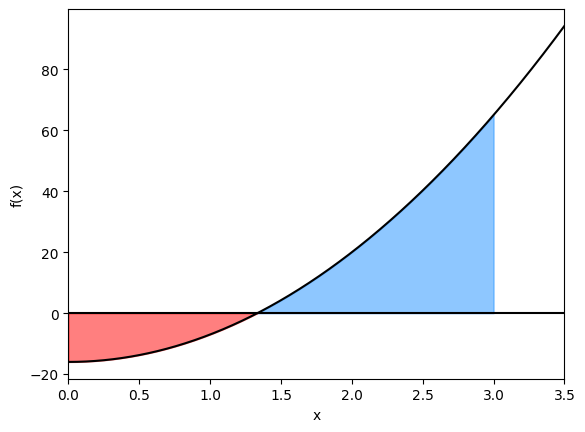

In [ ]:
##########################################
# Plot flow rates at beginning of 2023.
##########################################
x_in = np.linspace(0, 3.5, 1000)  # pick 1000 evenly spaced x-values from x=0 to x=3
plt.plot(x_in,  # plot a point at each x-value in array x
         9 * x_in**2 - 16,  # corresponding output 3x^2 - 4
         color ='black')  # plot curve in blue

###################
# Add axes to plot
###################
plt.axhline(y=0, color='black') # add a vertical axis at y=0

####################
# shade exact area
####################
x_fill1 = np.linspace(0, 4/3, 1000)
plt.fill_between(x_fill1, 9 * x_fill1**2 - 16, color='red', alpha=0.5)

x_fill2 = np.linspace(4/3, 3, 1000)
plt.fill_between(x_fill2, 9 * x_fill2**2 - 16, color='dodgerblue', alpha=0.5)

###############
# Plot options
###############
plt.xlabel('x')  # label on x-axis
plt.ylabel('f(x)')  # label for the y-axis
plt.xticks(np.arange(0, 4, step=0.5))  # Set tick marks
plt.xlim(0, 3.5)  # set limits on x-axis
#plt.ylim(-200, 600)  # set limits on y-axis
#plt.grid(True)  # add grid
plt.show()  # display plot

## Question 1a

---

Use the SymPy function `.solve()` to find the exact value of $x$ where the graph of $f(x)=9x^2-16$ intersects the $x$-axis. Then type your answer in the text cell below the code cell.

<br>  

*Note: Code to define `x` as a symbolic variable and `f` as a symbolic function is included in case you have not run the previous code cell where `x` and `f` are defined.*

In [ ]:
######################################
# Solution to Question 1a
######################################
x = sym.symbols('x')  # define x as a symbolic variable
f = 9 * x**2 - 16  # define symbolic function f(x) = 9x^2 - 16

sym.solve()  # replace ?? to complete the command

In [ ]:
######################################
# Solution to Question 1a
# Replace ?? to complete the command.
######################################
x = sym.symbols('x')  # define x as a symbolic variable
f = 9 * x**2 - 16  # define symbolic function f(x) = 9x^2 - 16

sym.solve(f, x)  # replace ?? to complete the command

[-4/3, 4/3]

### Solution to Question 1a

---

The $x$-intercept is located at ( <mark>??</mark> , 0).

<br>  

*Note: Enter the exact value of $x$ and not a decimal approximation.*


<br>  
<br>  


## Question 1b

---

Use the SymPy function `.integrate()` to calculate the area of the shaded region **above** the $x$-axis.



In [ ]:
###################################################
# Solution to Question 1b
# Replace ?? with a command using the .integrate()
# function to compute the area.
###################################################
area_above = ??  # area of shaded region above x-axis

area_above  # print area above x-axis to screen

In [ ]:
###################################################
# Solution to Question 1b
# Replace ?? with a command using the .integrate()
# function to compute the area.
###################################################
area_above = f.integrate((x, 4/3, 3))  # area of shaded region above x-axis

area_above  # print area above x-axis to screen

47.2222222222222

## Question 1c

---

Use the SymPy function `.integrate()` to calculate the area of the shaded region **below** the $x$-axis.

<br>  

*Hint: Areas are positive values. You may need to adjust your code (multiply by $-1$ for example) so the value stored in `area_below` is positive.*

In [ ]:
###################################################
# Solution to Question 1c
# Replace ?? with a command using the .integrate()
# function to compute the area.
###################################################
area_below = ??  # area of shaded region below x-axis

area_below  # print area below x-axis to screen

In [ ]:
###################################################
# Solution to Question 1c
# Replace ?? with a command using the .integrate()
# function to compute the area.
###################################################
area_below = -1 * f.integrate((x, 0, 4/3))  # area of shaded region below x-axis

area_below  # print area below x-axis to screen

14.2222222222222

## Question 1d

---


Complete the code cell below to use the areas stored in `area_above` and `area_below` to verify

$$\int_0^3 \left( 9x^2 - 16 \right) \, dx = 33.$$


<br>  

*Hint: The definite integral $\displaystyle \int_a^b f(x) \, dx$ is the sum of the areas above the $x$-axis, counted positively, and the areas below the $x$-axis, counted negatively.*

In [ ]:
######################################################
# Solution to Question 1d
# Replace ?? with an operation such as +, -, *, or /.
######################################################
integral_value = area_above ?? area_below  # compute value of definite integral

integral_value  # print value of definite integral

In [ ]:
######################################################
# Solution to Question 1d
# Replace ?? with an operation such as +, -, *, or /.
######################################################
integral_value = area_above - area_below  # compute value of definite integral

integral_value  # print value of definite integral

33.0000000000000

<a name="q2"></a>
# Question 2

---

You leave your home to go for a bike ride on a straight bike path to meet a friend at a lake, and then you both ride along another straight bike path to your friend's home. Your velocity $v(t)$, in km/hour, $t$ hours after leaving your home, is modeled by the formula

$$v(t) = 1000 t^3 - 1133 t^2 + 267 t.$$

where positive velocities take you toward the lake and negative velocities take you away from the lake. Run the code cell below to generate a plot of your velocity over the course of your bike ride and answer the questions that follow.


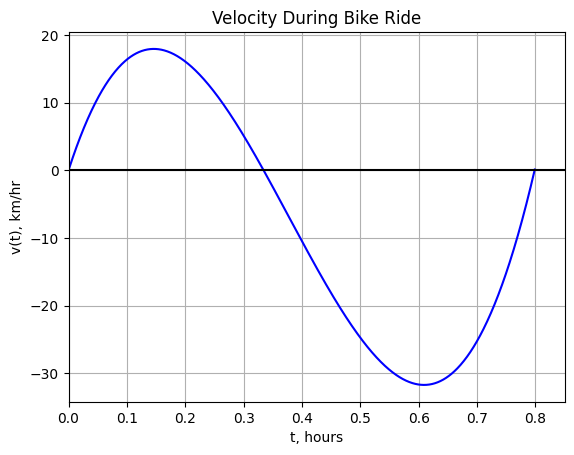

In [ ]:
##########################################
# Plot of velocity during bike ride
##########################################
t_in = np.linspace(0, 0.799, 1000)  # values of t where v(t) plotted
r_out = 1000 * t_in**3 - 1133 * t_in**2 + 267 * t_in  # velocities
plt.plot(t_in,  # plot a point at each t-value in array t_in
         r_out,  # corresponding velocity v(t)
         color ='blue')  # plot curve in blue

###################
# Add axes to plot
###################
plt.axhline(y=0, color='black') # add a vertical axis at y=0

###############
# Plot options
###############
plt.title('Velocity During Bike Ride')
plt.xlabel('t, hours')  # label on x-axis
plt.ylabel('v(t), km/hr')  # label for the y-axis
plt.xticks(np.arange(0, .9, step=0.1))  # Set tick marks
plt.xlim(0, 0.85)  # set limits on x-axis
plt.grid(True)  # add grid
plt.show()  # display plot

<a name="q2a"></a>
## Question 2a

---

Complete the code cell below to find the values of $t$ when your velocity is 0 km/hr.

In [ ]:
#######################################################
# Solution to Question 2a
# Replace ?? with command using to find when v(t) = 0.
#######################################################
t = sym.symbols('t')  # define t as a symbolic variable
v = 1000. * t**3 - 1133.  * t**2 + 267. * t  # define symbolic function v(t)

??  # find when v(t) = 0

In [ ]:
#######################################################
# Solution to Question 2a
# Replace ?? with command using to find when v(t) = 0.
#######################################################
t = sym.symbols('t')  # define t as a symbolic variable
v = 1000. * t**3 - 1133.  * t**2 + 267. * t  # define symbolic function v(t)

sym.solve(v, t)  # find when v(t) = 0

[0.0, 0.334288350852073, 0.798711649147927]

<a name="q2b"></a>
## Question 2b

---

Use the output from the code in [Question 2a](#q2a) to complete the code cell below to give the time in minutes that it takes you to reach the lake and to reach your friend's home.

In [ ]:
##########################
# Solution to Question 2b
##########################
lake_min = ??  # compute the number of minutes it takes to reach the lake
friend_min = ??  # compute the number of minutes it takes to reach your friend's home

print("It takes ", lake_min, " minutes for you to reach the lake.")
print("It takes ", friend_min, " minutes for you reach your friend's home.")

In [ ]:
##########################
# Solution to Question 2b
##########################
lake_min = 0.334288350852073 * 60  # compute the number of minutes it takes to reach the lake
friend_min = 0.798711649147927 * 60  # compute the number of minutes it takes to reach your friend's home

print("It takes ", round(lake_min, 0), " minutes for you to reach the lake.")
print("It takes ", round(friend_min, 0), " minutes for you reach your friend's home.")

It takes  20.0  minutes for you to reach the lake.
It takes  48.0  minutes for you reach your friend's home.


<a name="q2c"></a>
## Question 2c

---

Set up a definite integral that gives the distance of your home from the lake. Then use the `.integrate` function to compute the value of the definite integral in the code cell below. After running the code, type your answer in the text cell below the code cell.


In [ ]:
#################################################################
# Solution to Question 2c
# Replace the ?? with a command using the .integrate() function.
#################################################################
your_dist_to_lake = ??  # your distance to the lake

your_dist_to_lake  # print distance to screen

In [ ]:
#################################################################
# Solution to Question 2c
# Replace the ?? with a command using the .integrate() function.
#################################################################
your_dist_to_lake = v.integrate((t,0,0.334288350852073))  # your distance to the lake

your_dist_to_lake  # print distance to screen

3.93216952657044

### Solution to Question 2c

---


The distance of your home to the lake is <mark>[round to three decimal places]</mark> km.



<br>  
<br>  

<a name="q2d"></a>
## Question 2d

---

Set up a definite integral that gives the distance of your friend's home from the lake. Then use the `.integrate` function to compute the value of the definite integral in the code cell below. After running the code, type your answer in the text cell below the code cell.


In [ ]:
#################################################################
# Solution to Question 2d
# Replace the ?? with a command using the .integrate() function.
#################################################################
friend_dist_to_lake = ??  # friend's distance to the lake

friend_dist_to_lake  # print distance to screen

In [ ]:
#################################################################
# Solution to Question 2d
# Replace the ?? with a command using the .integrate() function.
#################################################################
friend_dist_to_lake = -1 * v.integrate((t, 0.334288350852073, 0.798711649147927))  # friend's distance to the lake

friend_dist_to_lake  # print distance to screen

9.45781161322425

### Solution to Question 2d

---


The distance of your friend's home to the lake is <mark>[round to three decimal places]</mark> km.



<br>  
<br>  


# Evaluating Indefinite Integrals with `.integrate()`.

---


We can similarly use the `.integrate()` function to evaluate an *indefinite integral*

$$\int f(x) \, dx.$$

In this case, we no longer have limits of integration. After we define the symbolic variable `x` and function `f`, we can use either the command `f.integrate(x)` or `sym.integrate(f, x)` to evaluate an indefinite integral.


## Interpreting the Output of an Indefinite Integral

---

The indefinite integral $\displaystyle \int f(x) \, dx$ is a family of functions $F(x)$ such that $F'(x) = f(x)$.

<a name="q3"></a>
# Question 3

---

Use the SymPy function `.integrate()` to evaluate the integral

$$\int \left( 9x^2 - 16 \right) \, dx.$$


In [ ]:
##################################
# Solution to Question 3
##################################
x = sym.symbols('x')  # define x as a symbolic variable
f = 9 * x**2 - 16  # define symbolic function f(x) = 9x^2 - 16

??  # enter a command using .integrate() to evaluate the integral

In [ ]:
##################################
# Solution to Question 3
##################################
x = sym.symbols('x')  # define x as a symbolic variable
f = 9 * x**2 - 16  # define symbolic function f(x) = 9x^2 - 16

f.integrate(x)  # enter a command using .integrate() to evaluate the integral

3*x**3 - 16*x

<a name="q4"></a>
# Question 4

---

Based on the solution to [Question 3](#q3), you should see that $F(x) = 3x^3 - 16x$ is one possible antiderivative of $f(x) = 9x^2 - 16$. Complete the code cell below to use the `.diff()` function to verify $F(x) = 3x^3 - 16x$ is an antiderivative of $f(x) = 9x^2 - 16$.

<br>  

*Hint: We say $F(x)$ is an antiderivative of $f(x)$ if $F'(x) = f(x)$.*


In [ ]:
#########################
# Solution to Question 4
#########################
F = ??  # define F(x) = 3x^3 - 16x as a symbolic function of x
??  # enter a command using .diff() to show F is an antiderivative of f

In [ ]:
#########################
# Solution to Question 4
#########################
F = 3 * x**3 - 16 * x  # define F(x) = 3x^3 - 16x as a symbolic function of x
F.diff(x)  # enter a command using .diff() to show F is an antiderivative of f

9*x**2 - 16

<a name="q5">
# Question 5

---

The output from [Question 3](#q3) is very helpful, but it is not quite the correct result for $\displaystyle \int \left( 9x^2 - 16 \right) \, dx$. Enter the correct answer by completing the solution in the text box below.


## Solution to Question 5

---

Replace the ?? in the equation below to complete the solution.


$$\int \left( 9x^2 - 16 \right) \, dx = 3x^3 - 16x + ?? $$


<br>  
<br>  

<a name="q6"></a>
# Question 6

---

Use the SymPy function `.integrate()` to evaluate the integral

$$\int \left( 5e^z + 3 \sin{z} \right) \, dz.$$

Based on the output of the code cell, type your answer in the text cell below the code cell.

<br>  

*Hint: Use the `sym.exp()` and `sym.sin()` functions to define and store the integrand to `g`. You can check your answer by inserting a code cell and using the `.diff()` function as done in [Question 3](#q3).*


In [ ]:
#################################################################
# Solution to Question 6
# Replace each ?? to complete the code to evaluate the integral.
#################################################################
z = sym.symbols('z')  # define z as a symbolic variable
g = ??  # define symbolic function g(z) = 5e^z + 3sin(z)

??  # enter a command using .integrate() to evaluate the integral

In [ ]:
#################################################################
# Solution to Question 6
# Replace each ?? to complete the code to evaluate the integral.
#################################################################
z = sym.symbols('z')  # define z as a symbolic variable
g = 5 * sym.exp(z) + 3 * sym.sin(z)  # define symbolic function g(z) = 5e^z + 3sin(z)

g.integrate(z)  # enter a command using .integrate() to evaluate the integral

5*exp(z) - 3*cos(z)

## Solution to Question 6

---

We have $\displaystyle \int \left( 5e^z + 3 \sin{z} \right) \, dz = $ <mark>[Type formula here]</mark> .


<br>  
<br>  

<a name="save-before"></a>
# Be Sure You Have Saved Your Work!
---

This lab is a shared Colab notebook available for anyone to view. However, since everyone is sharing this notebook, you do not have permission to save changes to this shared Colab notebook. In order to save your work:

1. You will need to set up a free Google Drive account. If you already have a Google Drive account, you are ready to go!
2. Click the `Copy to Drive` button to the right of the `+ Code` and `+ Text` buttons on top of the notebook.
3. Select from the menu `File/Save a Copy in Drive`.
  - By default, the notebook will be saved in a folder named **Colab Notebooks** in your Drive.
  - Feel free to rename and store the notebook wherever you like.


<a name="lab1summary"></a>
# Code Summary

---

# <mark> IGNORE THE REST</mark>

----

<a name="q2e"></a>
## Question 2e

---

Complete the code cell below to evaluate the integral

$$\int \left( 1000 t^3 - 1133 t^2 + 267 t \right) \, dt.$$

Then type your answer in the text cell below the code cell.


In [ ]:
#################################################################
# Solution to Question 2e
# Replace the ?? with a command using the .integrate() function.
#################################################################
??  # evaluate integral

In [ ]:
#################################################################
# Solution to Question 2e
# Replace the ?? with a command using the .integrate() function.
#################################################################
v.integrate(t)  # evaluate integral

250.0*t**4 - 377.666666666667*t**3 + 133.5*t**2

### Solution to Question 2e

---

Replace each ?? on the right side of the equation to enter your answer. If needed, round coefficients in your answer to three decimal places.


$$\int \left( 1000 t^3 - 1133 t^2 + 267 t \right) \, dt = ?? t^4 - ?? t^3 + ?? t^2 + ??.$$


<a name="q2f"></a>
## Question 2f

---

Give a formula for $s(t)$, your distance from the lake $t$ hours after you begin your bike ride.

### Solution to Question 2f

---

Replace each ?? on the right side of the equation with a value. If needed, round coefficients in your answer to three decimal places.


$$s(t) = ?? t^4 - ?? t^3 + ?? t^2 + ??.$$

<a name="q2g"></a>
## Question 2g

---

Use your formula in [Question 2f](#q2f) to calculate the total distance of your home from the lake and your friend's home from the lake to confirm your answers in Questions [2c](#q2c) and [2d](#q2d).


In [ ]:
#########################################################
# Solution to Question 2g
# Replace the first ?? with an expression for s(t).
# Replace second ?? with a value to compute the distance
#########################################################
s = 250.0 * t**4 - 377.667 * t**3 + 133.5 * t**2 + 3.932  # define symbolic function s(t)

s.evalf(subs={t: 0.798711649147927})  # distance of friend's home to lake

-1.59381193010304

In [ ]:
t = np.array([0, 10, 20, 35, 50])
rate = np.array([0, 30/60, 0, -24/60, 0])

In [ ]:
np.polyfit(t, rate, 3)

array([ 7.19929866e-05, -5.21073446e-03,  8.01535165e-02,  3.27878434e-02])

In [ ]:
np.polyfit(t, rate, 3)

array([  933.02910579, -1125.51864407,   288.55265926,     1.9672706 ])

# Question

Let $R(t) = (see below)$ denote the rate of change of the concentration of adrenaline, in picograms per milliliter per minute (pg/mL/min), $t$ minutes after a person has taken an injection of epeniphrene. Give some initial condition.

When is the rate of change equal to 0?

Evaluate the definite integral from t=0 to t=5 and interpret the practical meaning.

Evaluate the definite integral from t=0 to t=8 and interpret the practical meaning.

Give a general formula for the concentration of adrenaline in the body as a function of time $t$ and sketch the graph.

Compare graphs of $c(t)$ and $C(t)$.

- When the graph of $c(t)$ is negative, the graph of $C(t)$ is ??.
- When the graph of $c(t)$ is positive, the graph of $C(t)$ is ??.
- When the graph of $c(t)$ is zero, the graph of $C(t)$ is ??.


In [ ]:
t = np.array([0, 2, 5, 7, 8])
rate = np.array([0, -30, 0, 10, 0])

In [ ]:
np.polyfit(t, rate, 3)

array([ -0.81152738,  10.57348703, -32.68760807,  -0.1037464 ])

<a name="q1"></a>
# Question 1

---

Let $r(t) = 3x^2 -3$.

<a name="q1a"></a>
## Question 1a

---

Complete the code cell below to define the the function $f(x)$.

In [ ]:
###########################################
# Solution to Question 1a
###########################################
def r(t):  # function name is r with one input t
  return ?? # formula for r(t)

In [ ]:
###########################################
# Solution to Question 1a
###########################################
def r(t):  # function name is r with one input t
  return 3 * t**2 - 3  # formula for r(t)

<a name="q1c"></a>
## Question 1c

---

Run the code cell below to sketch a graph of $R$ and answer the following questions.

- Write a definite integral that represents the shaded area in the plot.

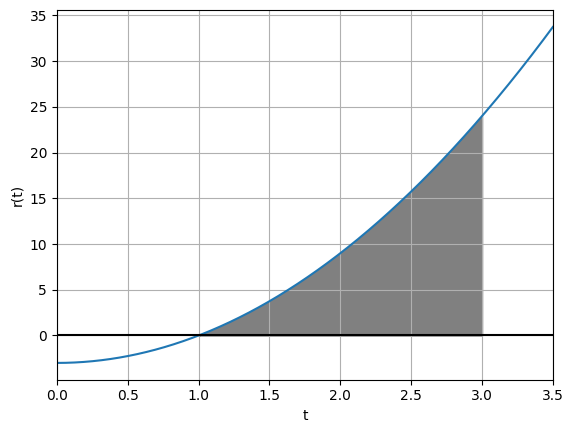

In [ ]:
############################
# Plot R(t)
############################
t = np.linspace(0, 3.5, 1000)  # pick 1000 evenly spaced t-values from x=0 to x=4
plt.plot(t,  # plot a point at each t-value in array t
         r(t))  # plot each point (x, f(x))


#############################
# shade area from t=0 to t=2
#############################
shade_int = np.linspace(1, 3, 1000)  # shaded interval from t=0 to t=2
plt.fill_between(shade_int, r(shade_int), color='gray')

###################
# Add axes to plot
###################
plt.axhline(y=0, color='black') # horizontal axis at y=0
#plt.axvline(x=0, color='black')  # vertical axis at x=0

###############
# Plot options
###############
#plt.title('Rate of Flow')  # main plot label
plt.xlabel('t')  # label on x-axis
plt.ylabel('r(t)')  # label for the y-axis
#plt.xticks(np.arange(0, 3, step=0.5))  # Set tick marks
plt.xlim(0,3.5)  # set limits on x-axis
#plt.ylim(0, 400)  # set limits on y-axis
plt.grid(True)  # add grid
plt.show()  # display plot

### Solution to Question 1c

---

Replace each ?? in the formula below to write a definite integral that represents the shaded area.

$$\int_{ ?? }^{ ?? } \left( 3t^2 - 3 \right) \, dt$$


<br>  
<br>  

<a name="q2"></a>
# Question 2

---

Run the code cell below to sketch a graph of a Riemann sum approximation for the definite integral in [Question 1b](#q1b).


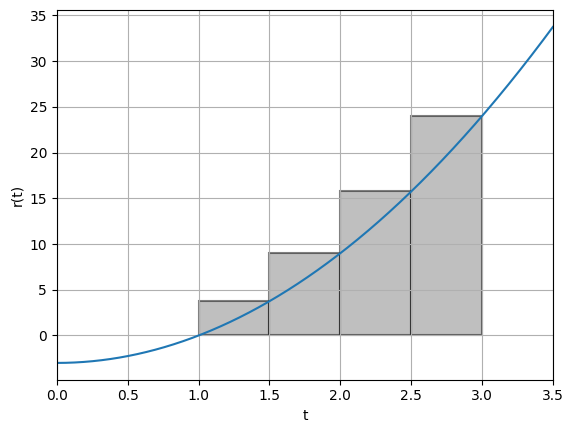

In [ ]:
############################
# Plot r(t)
############################
t = np.linspace(0, 3.5, 1000)  # pick 1000 evenly spaced t-values from t=0 to t=2
plt.plot(t,  # plot a point at each t-value in array t
         r(t))  # plot each point (x, f(x))


#####################################
# Add rectangles to approximate area
#####################################
base = 0.5
endpts = np.linspace(1, 3, 5)

plt.bar(endpts[:-1],
        r(endpts[1:]),
        width=base,
        alpha=0.5,
        facecolor='gray',
        align='edge',
        edgecolor = 'black',
        linewidth=1.5)

###############
# Plot options
###############
#plt.title('Rate of Flow')  # main plot label
plt.xlabel('t')  # label on x-axis
plt.ylabel('r(t)')  # label for the y-axis
#plt.xticks(np.arange(0, 3, step=0.5))  # Set tick marks
plt.xlim(0,3.5)  # set limits on x-axis
#plt.ylim(0, 400)  # set limits on y-axis
plt.grid(True)  # add grid
plt.show()  # display plot

<a name="q2a"></a>
## Question 2a

---

Do the rectangles represent a left or right sum approximation for the definite integral you identified in [Question 1b](#q1b)?


### Solution to Question 2a

---


The rectangles represent a <mark>??</mark> sum.



<br>  
<br>  

<a name="q2b"></a>
## Question 2b

---

What are the values of $n$ and $dt$?




### Solution to Question 2b

---

- $n =$ <mark>??</mark>

- $dt =$ <mark>??</mark>


<a name="q2c"></a>
## Question 2c

---

Do the rectangles lead to an upper or a lower estimate?



### Solution to Question 2c

---

The rectangles lead to <mark>??</mark> estimate.


<br>  
<br>  

<a name="q2d"></a>
## Question 2d

---

Complete the code cell below to calculate the area of the shaded rectangles.

<br>  

*Caution: Be sure you have already defined the function `R(t)` [Question 1a](#q1a) before completing the code cell below.*

In [ ]:
#################
# Solution to 2d
#################
dt = ??  # value of dt (from question 2b)

# formula to calculate sum of the areas of the rectangles
area = r(??) * dt + r(??) * dt + r(??) * dt + r(??) * dt  # replace each ?? with a value for t
area  # print area to screen

In [ ]:
#################
# Solution to 2d
#################
dt = 0.5  # value of dt (from question 2b)

# formula to calculate sum of the areas of the rectangles
area = r(1.5) * dt + r(2) * dt + r(2.5) * dt + r(3) * dt  # replace each ?? with a value for t
area  # print area to screen

26.25

<a name="plot-help"></a>
# A Riemann Sum Plotter

---

The `riemann_plot(f, a, b, n, method, xmin, xmax)` function plots and calculates left or right sum approximations for a definite integral

$$\int_a^b f(x) \, dx.$$

- The first input `f` defines the function inside the definite integral (or **integrand**).
  - First define a Python function `f(x)` as done with `R(t)` in [Question 1a](#q1a).
  - When entering the we simply enter `f` and not `f(x)`.
- The inputs `a`, `b`, and `n` are values for the lower and upper limits the definite integral.
- The input `n` is an integer that defines the number of subintervals to divide the interval $a \leq x \leq b$.
- The `method` parameter can be set to either `'left'` or `'right'` to calculate either a left or right sum.
  - The method is typed in lowercase inside quotes.
- `xmin` and `xmax` are two optional parameters that can be used to set the $x$-axis window for the plot.
  - If a value for `xmin` is not entered, then `xmin = a` is used by default.
  - If a value for `xmax` is not entered, then `xmax = b` is used by default.

<br>




<a name="q4"></a>
# Question 4

---

Running the code cell below will result in an error message. Correct the errors so the code cell runs without crashing and confirm your answers to [Question 2](#q2).

<br>  

*Hint: Be sure you have already defined the function `R(t)` in [Question 1a](#q1a) and [loaded the `riemann_plot()` function](#load-plotter) at the start of this lab. See the [documentation above](#plot-help) for help with the inputs in `riemann_plot()`.*


In [ ]:
####################################
# Correct errors in code and run
# to confirm answers to question 2.
# Then summarize the errors and
# corresponding corrections to code.
#####################################
riemann_plot(f = r(t),  # the integrand
             a = 1,  # lower limit
             b = 3,  # upper limit
             n = 4,  # number of subdivisions
             method = right,  # left or right sum
             xmin = 0,  # start of x-window for plot
             xmax = 3.5)  # end of x-window for plot

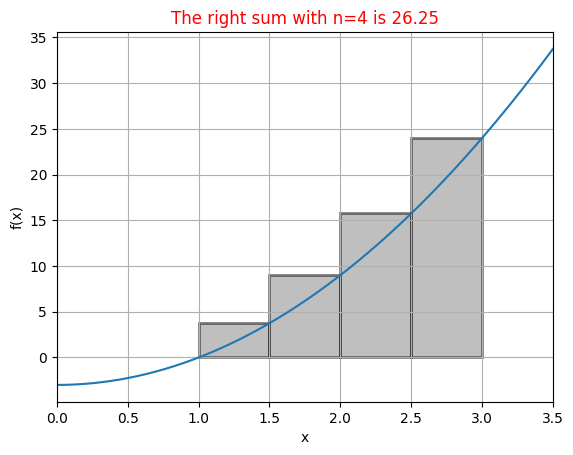

In [ ]:
##########################
# Solution to Question 5b
##########################
riemann_plot(f = r,  # the integrand
             a = 1,  # lower limit
             b = 3,  # upper limit
             n = 4,  # number of subdivisions
             method = 'right',  # left or right sum
             xmin = 0,  # start of x-window for plot
             xmax = 3.5)  # end of x-window for plot

## Solution to Question 4

---

Summarize the correction(s) you made to make the code cell above work.

- <mark>Correction 1</mark>
- <mark>Correction 2</mark>

<br>  
<br>  

<a name="q5"></a>
# Question 5

---

Use the `riemann_plot()` function in the code cell below to confirm your answers to [Question 3](#q3).


<br>

<br>  

*Hint: Be sure you have already defined the function `R(t)` in [Question 1a](#q1a) and [loaded the `riemann_plot()` function](#load-plotter) at the start of this lab. See the [documentation above](#plot-help) for help with the inputs in `riemann_plot()`.*



In [ ]:
#########################
# Solution to Question 5
#########################
riemann_plot(f = ??,  # the integrand
             a = ??,  # lower limit
             b = ??,  # upper limit
             n = ??,  # number of subdivisions
             method = '??',  # left or right sum
             xmin = 0,  # start of x-window for plot
             xmax = 3)  # end of x-window for plot

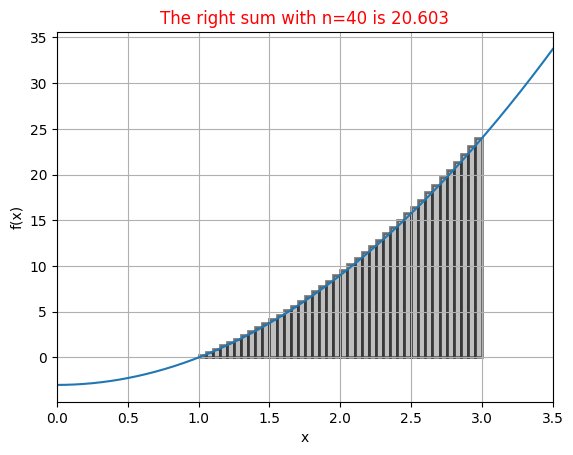

In [ ]:
#########################
# Solution to Question 5
#########################
riemann_plot(f = r,  # the integrand
             a = 1,  # lower limit
             b = 3,  # upper limit
             n = 40,  # number of subdivisions
             method = 'right',  # left or right sum
             xmin = 0,  # start of x-window for plot
             xmax = 3.5)  # end of x-window for plot

# Question 6

---

Evaluate the integral

$$\int_1^3 \left( 3x^2 - 3 \right) \, dx.$$

### Question a

---

$$\int_1^3 \left( 3x^2 - 3 \right) \, dx = ( ?? x^3 - ?? x ) \bigg|_1^3 = (??) - (??) = ??.$$

# Question 7

---


Find antiderivative (with SymPy).


Calculate total change in antiderivative (with SymPy).

In [ ]:
x = sym.symbols('x')

f = 3 * x**2 - 3
f

3*x**2 - 3

In [ ]:
F = f.integrate(x)
F

x**3 - 3*x

In [ ]:
F.diff(x)

3*x**2 - 3

In [ ]:
F.evalf(subs={x: 3}) - F.evalf(subs={x: 1})

20.0000000000000

# Question 8

---


Evaluate definite integral (with SymPy).



In [ ]:
area = sym.integrate(f, (x, 1, 3))
area

20

# Question

---

Evaluate the indefinite integral $\displaystyle \int \left( \cos(x) - 5e^x + \frac{1}{\sqrt{x}} \right) \, dx$

In [ ]:
#x = sym.symbols('x')

g = sym.cos(x) - 5 * sym.exp(x) + 1/sym.sqrt(x)
g

-5*exp(x) + cos(x) + 1/sqrt(x)

In [ ]:
G = g.integrate(x)
G

2*sqrt(x) - 5*exp(x) + sin(x)

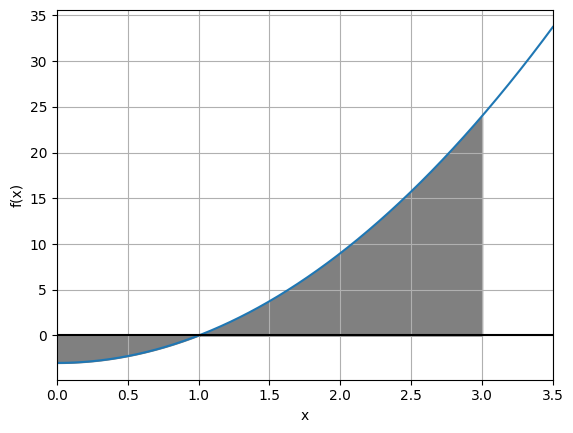

In [ ]:
############################
# Plot R(t)
############################
t = np.linspace(0, 3.5, 1000)  # pick 1000 evenly spaced t-values from x=0 to x=4
plt.plot(t,  # plot a point at each t-value in array t
         3 * t**2 - 3)  # plot each point (x, f(x))


#############################
# shade area from t=0 to t=2
#############################
shade_int = np.linspace(0, 3, 1000)  # shaded interval from t=0 to t=2
plt.fill_between(shade_int, 3 * shade_int**2 - 3, color='gray')

###################
# Add axes to plot
###################
plt.axhline(y=0, color='black') # horizontal axis at y=0
#plt.axvline(x=0, color='black')  # vertical axis at x=0

###############
# Plot options
###############
#plt.title('Rate of Flow')  # main plot label
plt.xlabel('x')  # label on x-axis
plt.ylabel('f(x)')  # label for the y-axis
#plt.xticks(np.arange(0, 3, step=0.5))  # Set tick marks
plt.xlim(0,3.5)  # set limits on x-axis
#plt.ylim(0, 400)  # set limits on y-axis
plt.grid(True)  # add grid
plt.show()  # display plot

In [ ]:
area = f.integrate((x, 1, 3)) - f.integrate((x, 0, 1))
area

22

<a name="q9"></a>
# Question 9

---

Consider the function $\displaystyle f(x) = e^{-0.3x}$ and answer the questions.






<a name="q9a"></a>
## Question 9a

---

Complete the code cell below to define a Python function `f(x)` for $\displaystyle f(x) = e^{-0.3x}$.



In [ ]:
###########################################
# Solution to Question 9a
###########################################
def f(x):  # function name is f with one input x
  return ??  # formula for f(x)

In [ ]:
###########################################
# Solution to Question 9a
###########################################
def f(x):  # function name is f with one input x
  return np.exp(-0.3 * x)  # formula for f(x)

<a name="q9b"></a>
## Question 9b

---

Use the `riemann_plot()` function to approximate


$$\int_{2}^{5} e^{-0.3 x} \, dx.$$

using a left sum with $n=10$. Then state whether the sum is an over or underestimate for the value of the definite integral.

In [ ]:
##########################
# Solution to Question 9b
##########################
riemann_plot(f = ??,  # the integrand
             a = ??,  # lower limit
             b = ??,  # upper limit
             n = ??,  # number of subdivisions
             method = '??',  # left or right sum
             xmin = 0,  # start x-window for plot at x=0
             xmax = 7)  # end x-window for plot at x=7

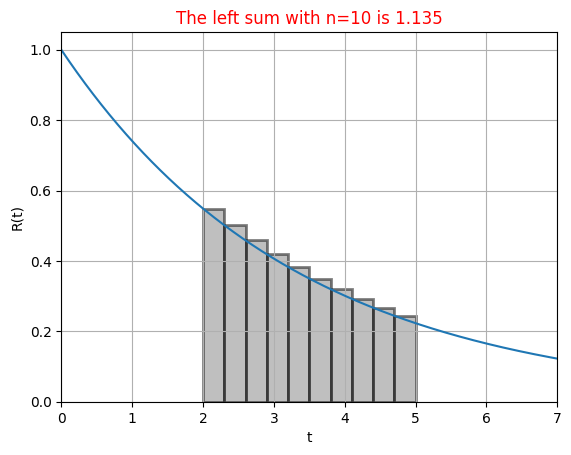

In [ ]:
##########################
# Solution to Question 9b
##########################
riemann_plot(f = f,  # the integrand
             a = 2,  # lower limit
             b = 5,  # upper limit
             n = 10,  # number of subdivisions
             method = 'left',  # left or right sum
             xmin = 0,  # start x-window for plot at x=0
             xmax = 7)  # end x-window for plot at x=7

### Solution to Question 9b

---

Is the approximation an overestimate or an underestimate?

The approximation for $\displaystyle \int_{2}^{5} e^{-0.3 x} \, dx$ is <mark>??</mark>.



<br>  
<br>  



<a name="q9c"></a>
## Question 9c

---

Use the `riemann_plot()` function to approximate


$$\int_{1}^{6} e^{-0.3 x} \, dx.$$

using a right sum with $n=25$. Then state whether the sum is an over or underestimate for the value of the definite integral.

In [ ]:
##########################
# Solution to Question 6c
##########################
riemann_plot(f = ??,  # the integrand
             a = ??,  # lower limit
             b = ??,  # upper limit
             n = ??,  # number of subdivisions
             method = '??',  # left or right sum
             xmin = 0,  # start x-window for plot at x=0
             xmax = 7)  # end x-window for plot at x=7

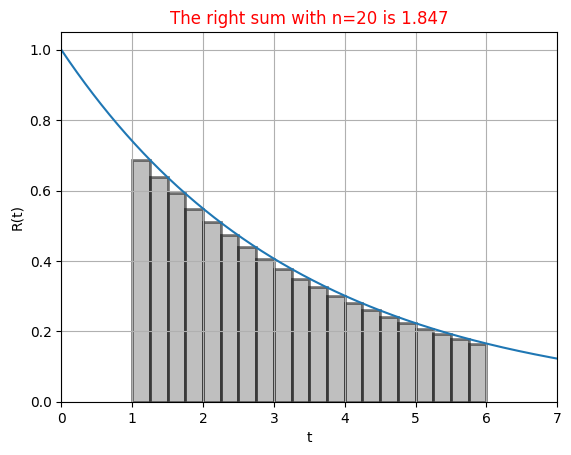

In [ ]:
##########################
# Solution to Question 6c
##########################
riemann_plot(f = f,  # the integrand
             a = 1,  # lower limit
             b = 6,  # upper limit
             n = 20,  # number of subdivisions
             method = 'right',  # left or right sum
             xmin = 0,  # start x-window for plot at x=0
             xmax = 7)  # end x-window for plot at x=7

### Solution to Question 9c

---

Is the approximation an overestimate or an underestimate?

The approximation for $\displaystyle \int_{1}^{6} e^{-0.3 x} \, dx$ is <mark>??</mark>.



<br>  
<br>  



## Question 9d

---

Evaluate the indefinite integral.

## Question 9e

---

Check previous result by taking the derivative.

## Question 9f

---

Calculate the total change in the value of the antiderivative.